In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt 
import numpy as np

2024-10-28 20:53:42.874217: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-28 20:53:42.884634: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-28 20:53:42.968693: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-28 20:53:43.042580: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-28 20:53:43.091164: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
img_array = cv2.imread("archive/train/0/Training_3908.jpg")

In [3]:
img_array.shape #rgb

(48, 48, 3)

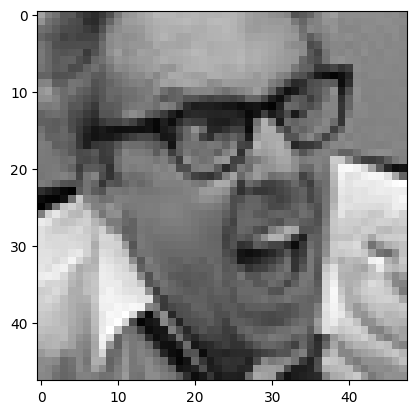

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory = "archive/train/"

In [6]:
classes = ["0","1","2","3","4","5","6"] 

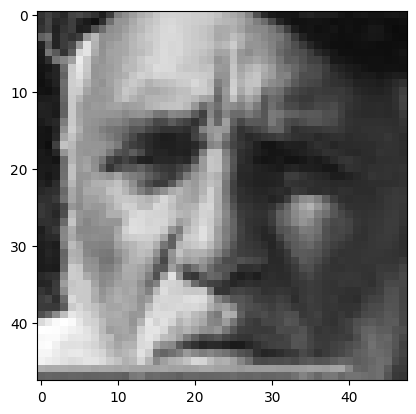

In [7]:
for category in classes :
    path = os.path.join(Datadirectory , category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
         
    break 

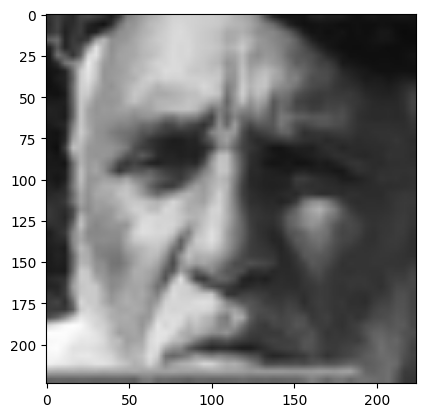

In [8]:
img_size = 224 #because of transfer learning
new_array = cv2.resize(img_array , (img_size , img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape

(224, 224, 3)

In [10]:
training_data =[]

def create_training_data():
    for category in classes :
       path = os.path.join(Datadirectory , category)
       class_num = classes.index(category)
       for img in os.listdir(path):
           try:
               img_array = cv2.imread(os.path.join(path,img))
               new_array = cv2.resize(img_array , (img_size , img_size))
               training_data.append([new_array,class_num])

           except Exception as e :
               pass
        

In [11]:
create_training_data()

In [12]:
print(len(training_data))

28709


In [13]:
import random

random.shuffle(training_data)

In [14]:
X= []
y= []

for features,label in training_data : 
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1 , img_size , img_size , 3)

In [15]:
X.shape

(28709, 224, 224, 3)

In [16]:
X.shape

(28709, 224, 224, 3)

In [17]:
X =X [ : 1000, :]
y = np.array(y)
y = y[:1000]

In [18]:
X = X/255.0;

In [19]:
X.shape

(1000, 224, 224, 3)

In [20]:
y.shape

(1000,)

# Model

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
model = tf.keras.applications.MobileNetV2()

I0000 00:00:1730145233.300470   19005 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-28 20:53:53.301206: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [23]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [24]:
base_input = model.input
base_output = model.layers[-2].output

In [25]:
final_output = layers.Dense(128)(base_output) # adding new layer , after the output 
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output) 
final_output = layers.Dense(7,activation = 'softmax')(final_output)

In [26]:
new_model = keras.Model(inputs = base_input , outputs = final_output)

In [27]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 2,396,551 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [30]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])

In [31]:
new_model.fit(X,y, epochs = 25)

Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3172 - loss: 1.7320
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.5566 - loss: 1.2538
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.6473 - loss: 1.0254
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.7076 - loss: 0.8079
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.7766 - loss: 0.6442
Epoch 6/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.7931 - loss: 0.5749
Epoch 7/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.8238 - loss: 0.5179
Epoch 8/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8759 - loss: 0.4084
Epoch 9/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8461 - loss: 0.5066
Epoch 10/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8876 - loss: 0.3634
Epoch 11/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9431 - loss: 0.1811
Epoch 12/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9571 - lo

In [32]:
frame = cv2.imread("happy.jpg")

In [33]:
frame.shape

(630, 768, 3)

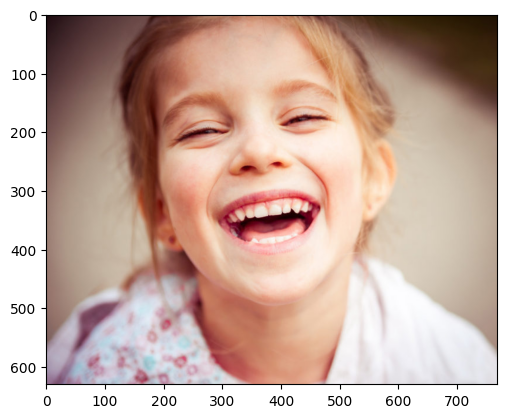

In [34]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [36]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [40]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [41]:
gray.shape

(630, 768)

In [42]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces : 
    roi_gray = gray [y:y+h ,x:x+w]
    roi_color = frame[y:y+h , x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h) , (255,0,0),2)
    faces = faceCascade.detectMultiScale(roi_gray)
    if len(faces)==0 :
        print("face not detected")
    else : 
        for (ex,ey,ew,eh) in faces:
            face_roi = roi_color[ey:ey+eh,ex:ex+ew]

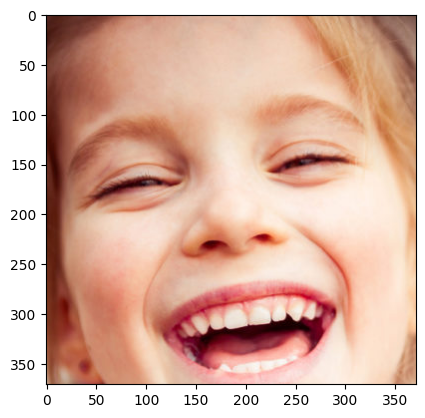

In [44]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [45]:
final_image =cv2.resize(face_roi , (224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

In [46]:
prediction = new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


In [47]:
prediction[0]

array([2.7375604e-04, 2.5083343e-08, 7.3979231e-06, 9.8808265e-01,
       1.1260662e-02, 3.6317392e-04, 1.2399413e-05], dtype=float32)

In [48]:
np.argmax(prediction)

3